# Data Explore

## Load modules

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from collections import Counter
from subprocess import check_output

In [32]:
MEMBERS = pd.read_csv("../data/raw/MEMBERS_subset_TRAIN.csv", parse_dates=True)

In [33]:
MEMBERS.head()

,msno,registration_init_time,city,bd,gender,registered_via,_dataobs_
0,DcsEUiNluuWJpgE0xsqViKaWEVG3Phw6GEidDO7WTa0=,2014-10-25,4,35,female,3,151
1,Uc6U4vUApMvVPhdCcOX/bk8Q61bUwHqdmZRpkEuSn6k=,2014-10-26,1,45,female,3,166
2,u05b27BhTPzuCEs+64NV3vntjEFXnxXpasJoTYZiPVM=,2014-10-28,1,51,male,3,212
3,q7a3cgDX32yxVZ8+wgkltxBHvjLMam7gd4AGtA2Mnes=,2014-11-02,1,0,NaN,9,288
4,xt3x86CidZyZhnU0dKjp5jF3XcapifSU0jSkIFfSn6g=,2014-11-02,1,37,male,3,303


In [34]:
MEMBERS.describe()

,city,bd,registered_via,_dataobs_
count,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,3.830780,9.759410,5.255210,3.380133e+06
std,5.464354,16.317812,2.360829,1.956257e+06
min,1.000000,-506.000000,1.000000,1.510000e+02
25%,1.000000,0.000000,4.000000,1.684020e+06
50%,1.000000,0.000000,4.000000,3.377832e+06
75%,4.000000,21.000000,7.000000,5.067187e+06
max,22.000000,1029.000000,19.000000,6.769339e+06


In [35]:
MEMBERS[MEMBERS["gender"].isna() == True]

,msno,registration_init_time,city,bd,gender,registered_via,_dataobs_
3,q7a3cgDX32yxVZ8+wgkltxBHvjLMam7gd4AGtA2Mnes=,2014-11-02,1,0,NaN,9,288
7,RnGFlJLKI5TJbZbAln7UM6scpxEcn1BPa0GCTaNLdAk=,2016-12-24,1,0,NaN,4,495
8,2237rQOG7o59tpbgp8aHrvs8FSQs2dyZ6dAMyKTCkhQ=,2016-12-27,1,0,NaN,4,563
9,ii5zT0mq1i3CfbiaJfzQac7XwCWdGCZeq54gyaMU2uQ=,2016-12-31,1,0,NaN,4,649
10,EsQRjAOWQLOld+BkvuQrPonPQla/LQmFZupwH8dtnes=,2017-01-06,1,0,NaN,4,783
11,hvCI+Qj5SGTdzAK84uc63sS1li8XCU0HqYkcTZBX/CE=,2017-01-10,1,0,NaN,4,858
12,bpkbjevoiZY4q6QVFGitmYQOHfgKogywBXVsAvsgTaQ=,2017-01-13,1,0,NaN,4,894
13,cFMxlE04/LYqXBvMUyiMgz7ZxK4CMTvFaBdNWfLwLiw=,2017-01-16,1,0,NaN,4,952
14,jX+3htdsg9vbIEetMrE4zCHv+5x7bkzbhxfDbuA0tzI=,2017-01-18,1,0,NaN,4,990
15,PrmUAZalFMNZGUnOGbHVBgIDOurjbx9nEFirNBMJXKM=,2017-01-20,1,0,NaN,4,1023


In [36]:
STATUS = pd.read_csv("../data/raw/STATUS_subset_TRAIN.csv")

In [37]:
STATUS.head()

,msno,status
0,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,1
1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,1
2,++FNH/2Fg+6/Q+61X5t3PTVvNsFC699bnEVaVN6HT+o=,1
3,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,1
4,++UEvwqAY2F9VpiLLHeicRU4D6FzbSDiaDrFkPrhqq8=,1


In [38]:
STATUS['status'] = STATUS['status'].astype(str)
STATUS['status'].value_counts()

1    31577
0    18139
Name: status, dtype: int64

In [39]:
training = pd.merge(left = STATUS,right = MEMBERS,how = 'left',on=['msno'])
training.head()

,msno,status,registration_init_time,city,bd,gender,registered_via,_dataobs_
0,++9l7+WGOZ96gNp0TDXxHAydOlXYE0CiuqWFTxA6zZI=,1,NaN,NaN,NaN,NaN,NaN,NaN
1,++AH7m/EQ4iKe6wSlfO/xXAJx50p+fCeTyF90GoE9Pg=,1,NaN,NaN,NaN,NaN,NaN,NaN
2,++FNH/2Fg+6/Q+61X5t3PTVvNsFC699bnEVaVN6HT+o=,1,NaN,NaN,NaN,NaN,NaN,NaN
3,++L3Kr4/CtPSdU9BrsaX/E9ziEKoD9yK5vwk8DVXmHo=,1,NaN,NaN,NaN,NaN,NaN,NaN
4,++UEvwqAY2F9VpiLLHeicRU4D6FzbSDiaDrFkPrhqq8=,1,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49716 entries, 0 to 49715
Data columns (total 8 columns):
msno                      49716 non-null object
status                    49716 non-null object
registration_init_time    670 non-null object
city                      670 non-null float64
bd                        670 non-null float64
gender                    467 non-null object
registered_via            670 non-null float64
_dataobs_                 670 non-null float64
dtypes: float64(4), object(4)
memory usage: 3.4+ MB


In [41]:
training = training.dropna()

In [42]:
training['registration_init_time'] = training['registration_init_time'].map(lambda x: datetime(int(x[:4]), int(x[5:7]), int(x[8:])))
training.head()

,msno,status,registration_init_time,city,bd,gender,registered_via,_dataobs_
180,+CAgJExAWVktNEy+r7SBAvTqhpqIgiddl4VnWw7m8PU=,0,2009-06-16,5.0,22.0,male,9.0,461680.0
207,+EAQHIKdaJDRCZzSTghyDq2Tdyvx9gjSjNdhPGq8Eak=,1,2016-09-27,5.0,27.0,male,4.0,4885650.0
222,+FHDBZU9XyIWacK15PxB29ZtU4RrEqfa89NIe4EJEY8=,1,2014-04-26,15.0,0.0,female,3.0,4427722.0
285,+L1gzFrfUNuEcydey3hh8fFppq3ppbxu+lT9afRGxmw=,1,2015-10-19,9.0,29.0,female,3.0,4608939.0
304,+M59M6qjcTDabIWvGKP1OdfGy50tBMQjvwb7H4Yeawo=,1,2015-10-07,1.0,26.0,male,4.0,3723989.0


## Training data

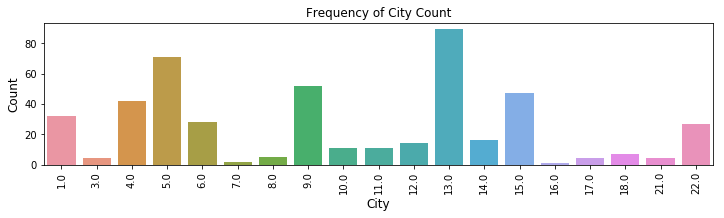

City Count [(13.0, 89), (5.0, 71), (9.0, 52), (15.0, 47), (4.0, 42), (1.0, 32), (6.0, 28), (22.0, 27), (14.0, 16), (12.0, 14), (10.0, 11), (11.0, 11), (18.0, 7), (8.0, 5), (21.0, 4), (17.0, 4), (3.0, 4), (7.0, 2), (16.0, 1)]


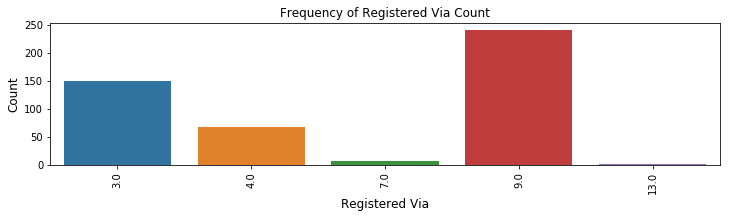

Registered Via Count [(9.0, 242), (3.0, 150), (4.0, 67), (7.0, 6), (13.0, 2)]


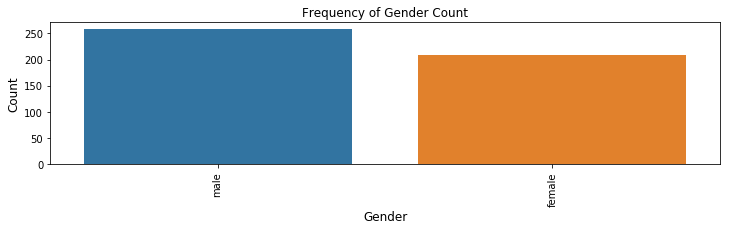

Gender Count [('male', 258), ('female', 209)]


In [43]:
# City count
plt.figure(figsize=(12,12))
plt.subplot(411)
city_order = training['city'].unique()
city_order=sorted(city_order, key=lambda x: float(x))
sns.countplot(x="city", data=training , order = city_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of City Count", fontsize=12)
plt.show()
city_count = Counter(training['city']).most_common()
print("City Count " +str(city_count))

#Registered Via Count
plt.figure(figsize=(12,12))
plt.subplot(412)
R_V_order = training['registered_via'].unique()
R_V_order = sorted(R_V_order, key=lambda x: str(x))
R_V_order = sorted(R_V_order, key=lambda x: float(x))
#above repetion of commands are very silly, but this was the only way I was able to diplay what I wanted
sns.countplot(x="registered_via", data=training,order = R_V_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Registered Via', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Registered Via Count", fontsize=12)
plt.show()
RV_count = Counter(training['registered_via']).most_common()
print("Registered Via Count " +str(RV_count))

#Gender count
plt.figure(figsize=(12,12))
plt.subplot(413)
sns.countplot(x="gender", data=training)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Gender Count", fontsize=12)
plt.show()
gender_count = Counter(training['gender']).most_common()
print("Gender Count " +str(gender_count))

### registration_init_time Trends exploration

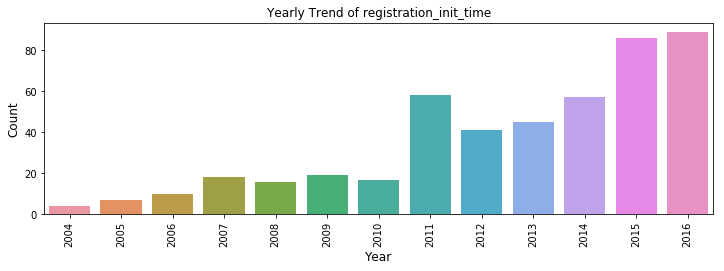

Yearly Count [(2016, 89), (2015, 86), (2011, 58), (2014, 57), (2013, 45), (2012, 41), (2009, 19), (2007, 18), (2010, 17), (2008, 16), (2006, 10), (2005, 7), (2004, 4)]


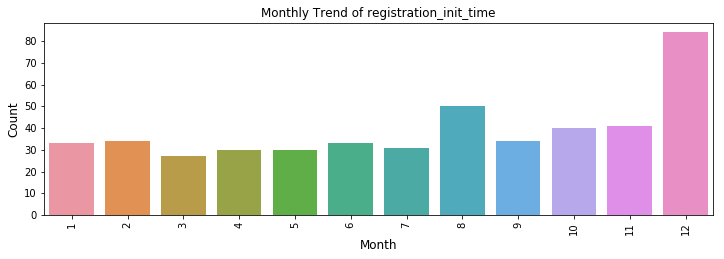

Monthly Count [(12, 84), (8, 50), (11, 41), (10, 40), (9, 34), (2, 34), (6, 33), (1, 33), (7, 31), (4, 30), (5, 30), (3, 27)]


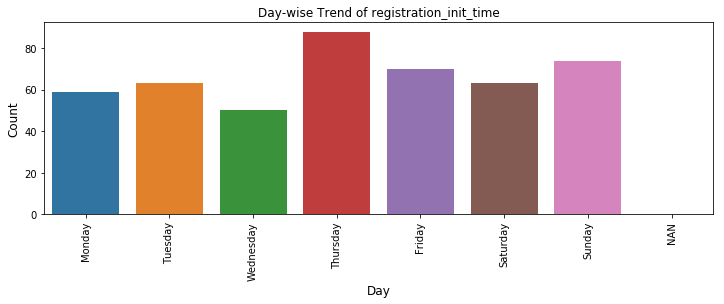

Day-wise Count [('Thursday', 88), ('Sunday', 74), ('Friday', 70), ('Tuesday', 63), ('Saturday', 63), ('Monday', 59), ('Wednesday', 50)]


In [44]:
#registration_init_time yearly trend
training['registration_init_time_year'] = pd.DatetimeIndex(training['registration_init_time']).year
training['registration_init_time_year'] = training.registration_init_time_year.apply(lambda x: int(x) if pd.notnull(x) else "NAN" )
year_count=training['registration_init_time_year'].value_counts()
#print(year_count)
plt.figure(figsize=(12,12))
plt.subplot(311)
year_order = training['registration_init_time_year'].unique()
year_order=sorted(year_order, key=lambda x: str(x))
year_order = sorted(year_order, key=lambda x: float(x))
sns.barplot(year_count.index, year_count.values,order=year_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Yearly Trend of registration_init_time", fontsize=12)
plt.show()
year_count_2 = Counter(training['registration_init_time_year']).most_common()
print("Yearly Count " +str(year_count_2))

#registration_init_time monthly trend
training['registration_init_time_month'] = pd.DatetimeIndex(training['registration_init_time']).month
training['registration_init_time_month'] = training.registration_init_time_month.apply(lambda x: int(x) if pd.notnull(x) else "NAN" )
month_count=training['registration_init_time_month'].value_counts()
plt.figure(figsize=(12,12))
plt.subplot(312)
month_order = training['registration_init_time_month'].unique()
month_order = sorted(month_order, key=lambda x: str(x))
month_order = sorted(month_order, key=lambda x: float(x))
sns.barplot(month_count.index, month_count.values,order=month_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Monthly Trend of registration_init_time", fontsize=12)
plt.show()
month_count_2 = Counter(training['registration_init_time_month']).most_common()
print("Monthly Count " +str(month_count_2))

#registration_init_time day wise trend
training['registration_init_time_weekday'] = pd.DatetimeIndex(training['registration_init_time']).weekday_name
training['registration_init_time_weekday'] = training.registration_init_time_weekday.apply(lambda x: str(x) if pd.notnull(x) else "NAN" )
day_count=training['registration_init_time_weekday'].value_counts()
plt.figure(figsize=(12,12))
plt.subplot(313)
#day_order = training['registration_init_time_day'].unique()
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','NAN']
sns.barplot(day_count.index, day_count.values,order=day_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Day-wise Trend of registration_init_time", fontsize=12)
plt.show()
day_count_2 = Counter(training['registration_init_time_weekday']).most_common()
print("Day-wise Count " +str(day_count_2))

## Relation of between train data set and members Data set

status,0,1,Ratio
gender,,,
female,91,118,1.296703
male,94,164,1.744681


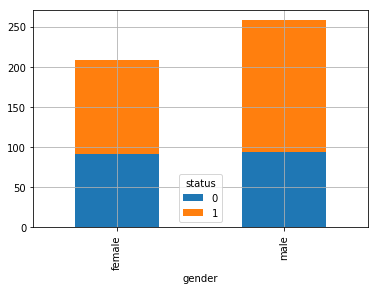

In [45]:
#Gender
gender_crosstab=pd.crosstab(training['gender'],training['status'])
gender_crosstab.plot(kind='bar', stacked=True, grid=True)
gender_crosstab["Ratio"] =  gender_crosstab.iloc[:, 1] / gender_crosstab.iloc[:, 0]
gender_crosstab

status,0,1,Ratio
registered_via,,,
3.0,53,97,1.830189
4.0,27,40,1.481481
7.0,4,2,0.500000
9.0,99,143,1.444444
13.0,2,0,0.000000


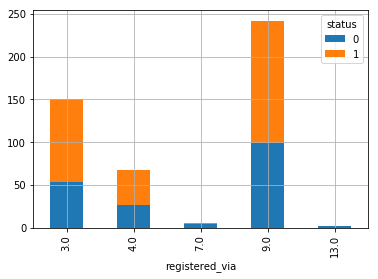

In [46]:
#Registered Via
registered_via_crosstab=pd.crosstab(training['registered_via'],training['status'])
registered_via_crosstab.plot(kind='bar', stacked=True, grid=True)
registered_via_crosstab["Ratio"] =  registered_via_crosstab.iloc[:, 1] / registered_via_crosstab.iloc[:, 0]
registered_via_crosstab

status,0,1,Ratio
city,,,
1.0,11,21,1.909091
3.0,3,1,0.333333
4.0,15,27,1.800000
5.0,27,44,1.629630
6.0,15,13,0.866667
7.0,1,1,1.000000
8.0,4,1,0.250000
9.0,6,46,7.666667
10.0,3,8,2.666667


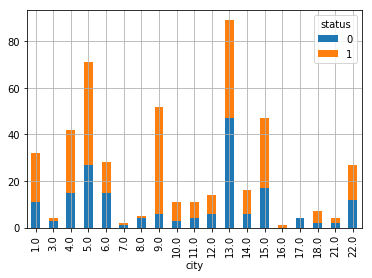

In [47]:
#city
city_crosstab=pd.crosstab(training['city'],training['status'])
city_crosstab.plot(kind='bar', stacked=True, grid=True)
city_crosstab["Ratio"] =  city_crosstab.iloc[:,1] / city_crosstab.iloc[:,0]
city_crosstab

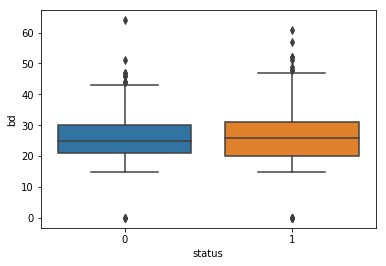

In [48]:
#Birth Date
sns.boxplot(x=training["status"],y=training["bd"],data=training);

## Data Exploration in members data ( just for comparison with training merged dataset )

In [49]:
MEMBERS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
msno                      100000 non-null object
registration_init_time    100000 non-null object
city                      100000 non-null int64
bd                        100000 non-null int64
gender                    34312 non-null object
registered_via            100000 non-null int64
_dataobs_                 100000 non-null int64
dtypes: int64(4), object(3)
memory usage: 5.3+ MB


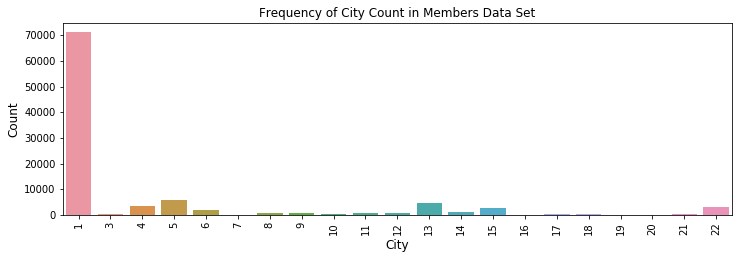

City Count [(1, 71150), (5, 5679), (13, 4612), (4, 3545), (22, 3067), (15, 2859), (6, 2033), (14, 1316), (12, 988), (8, 727), (9, 715), (11, 692), (18, 528), (10, 505), (21, 465), (17, 420), (3, 390), (7, 135), (16, 84), (20, 69), (19, 21)]


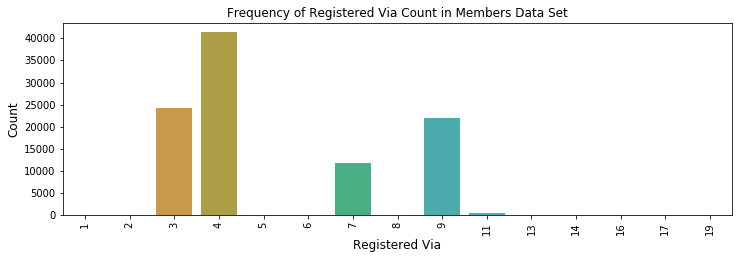

Registered Via Count [(4, 41376), (3, 24164), (9, 21955), (7, 11869), (11, 375), (13, 76), (8, 56), (5, 33), (17, 26), (6, 18), (2, 18), (14, 12), (16, 11), (19, 10), (1, 1)]


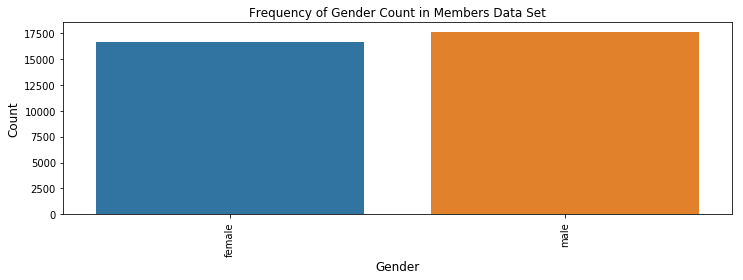

Gender Count [(nan, 65688), ('male', 17669), ('female', 16643)]


In [51]:
# City count in Members Data Set
plt.figure(figsize=(12,12))
plt.subplot(311)
sns.countplot(x="city", data=MEMBERS)
plt.ylabel('Count', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of City Count in Members Data Set", fontsize=12)
plt.show()
city_count = Counter(MEMBERS['city']).most_common()
print("City Count " +str(city_count))

#Registered Via Count in Members Data Set
plt.figure(figsize=(12,12))
plt.subplot(312)
sns.countplot(x="registered_via", data=MEMBERS)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Registered Via', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Registered Via Count in Members Data Set", fontsize=12)
plt.show()
RV_count = Counter(MEMBERS['registered_via']).most_common()
print("Registered Via Count " +str(RV_count))


#Gender count in Members Data Set
plt.figure(figsize=(12,12))
plt.subplot(313)
sns.countplot(x="gender", data=MEMBERS)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Gender Count in Members Data Set", fontsize=12)
plt.show()
gender_count = Counter(MEMBERS['gender']).most_common()
print("Gender Count " +str(gender_count))

In [52]:
tmp_1=training.bd.value_counts()
tmp_1.head()

20.0    43
21.0    33
22.0    29
27.0    27
19.0    24
Name: bd, dtype: int64

In [53]:
training['bd'] = training.bd.apply(lambda x: int(x) if pd.notnull(x) else "NAN" )
bd_count = Counter(training['bd']).most_common()
print("BD Count " +str(bd_count))

BD Count [(20, 43), (21, 33), (22, 29), (27, 27), (19, 24), (24, 24), (29, 23), (26, 23), (18, 21), (28, 20), (17, 16), (30, 16), (25, 15), (23, 14), (31, 13), (37, 12), (34, 12), (32, 11), (35, 10), (0, 9), (38, 9), (33, 7), (40, 7), (44, 5), (36, 5), (46, 5), (43, 5), (16, 4), (47, 4), (42, 3), (15, 3), (39, 3), (52, 2), (51, 2), (48, 2), (64, 1), (61, 1), (49, 1), (45, 1), (41, 1), (57, 1)]


In [54]:
#training.loc[(training['bd'] <= 1), 'bd'] = -99999
#training.loc[(training['bd'] >= 100), 'bd'] = -99999
training['bd'] = training.bd.apply(lambda x: -99999 if float(x)<=1 else x )
training['bd'] = training.bd.apply(lambda x: -99999 if float(x)>=100 else x )

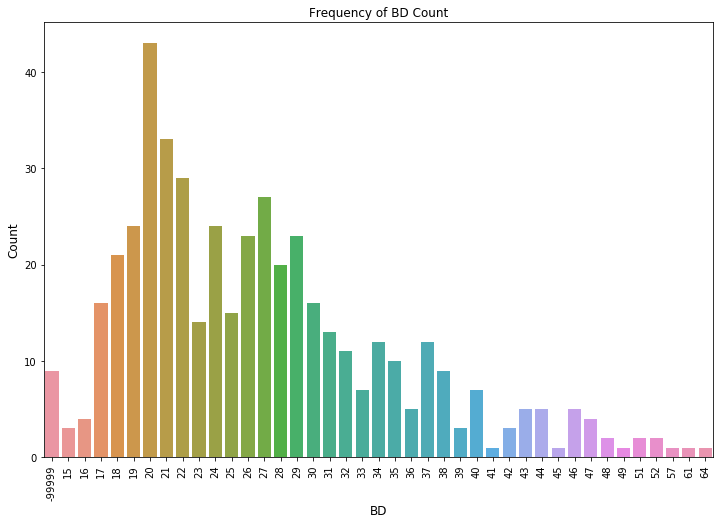

BD Count [(20, 43), (21, 33), (22, 29), (27, 27), (19, 24), (24, 24), (29, 23), (26, 23), (18, 21), (28, 20), (17, 16), (30, 16), (25, 15), (23, 14), (31, 13), (37, 12), (34, 12), (32, 11), (35, 10), (-99999, 9), (38, 9), (33, 7), (40, 7), (44, 5), (36, 5), (46, 5), (43, 5), (16, 4), (47, 4), (42, 3), (15, 3), (39, 3), (52, 2), (51, 2), (48, 2), (64, 1), (61, 1), (49, 1), (45, 1), (41, 1), (57, 1)]


In [55]:
#Birth Date count in training Data Set
plt.figure(figsize=(12,8))
bd_order = training['bd'].unique()
bd_order = sorted(bd_order, key=lambda x: str(x))
bd_order = sorted(bd_order, key=lambda x: float(x))
#above repetion of commands are very silly, but this was the only way I was able to diplay what I wanted
sns.countplot(x="bd", data=training , order = bd_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('BD', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of BD Count", fontsize=12)
plt.show()
bd_count = Counter(training['bd']).most_common()
print("BD Count " +str(bd_count))

Mean of Birth Date = 27.11353711790393
Median of Birth Date = 26.0


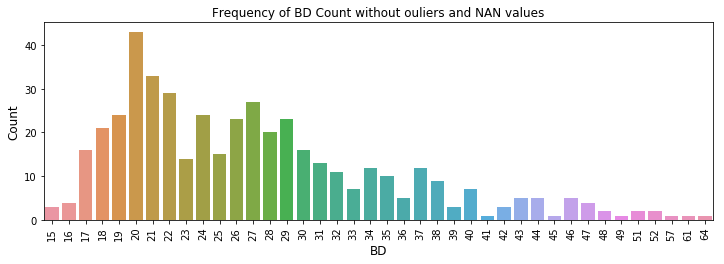

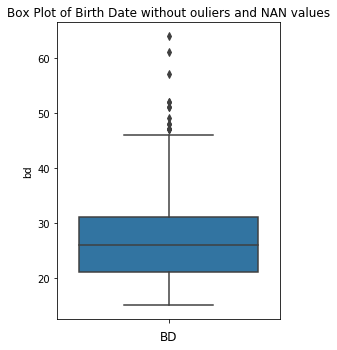

In [57]:
tmp_bd = training[training.bd != -99999]
print("Mean of Birth Date = " +str(np.mean(tmp_bd['bd'])))
print("Median of Birth Date = " +str(np.median(tmp_bd['bd'])))
#print("Mode of Birth Date = " +str(np.mode(tmp_bd['bd'])))
plt.figure(figsize=(12,8))
plt.subplot(211)
bd_order_2 = tmp_bd['bd'].unique()
bd_order_2 = sorted(bd_order_2, key=lambda x: float(x))
sns.countplot(x="bd", data=tmp_bd , order = bd_order_2)
plt.ylabel('Count', fontsize=12)
plt.xlabel('BD', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of BD Count without ouliers and NAN values", fontsize=12)
plt.show()

plt.figure(figsize=(4,12))
plt.subplot(212)
sns.boxplot(y=tmp_bd["bd"],data=tmp_bd)
plt.xlabel('BD', fontsize=12)
plt.title("Box Plot of Birth Date without ouliers and NAN values", fontsize=12)
plt.show()

In [30]:
TRANSACTION = pd.read_csv("../data/raw/TRANSACTION_subset_TRAIN.csv", parse_dates=True)

In [32]:
TRANSACTION.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,_dataobs_
0,++38dVm0EHKCOfND6oEal3xFKtqJYZTZJmnpbAOOZBk=,41,30,99,99,1,2016-10-23,2016-11-23,0,288
1,++3FNwZTm6haRgXV0ZRonrNvMxKD9F64lQhIQmQ9wIE=,41,30,149,149,1,2015-09-10,2015-09-10,1,325
2,++7IULiyKbNc8jllqhRuyKZjX1J4mPF4tsudFCJfv4k=,37,30,149,149,1,2015-08-01,2015-09-01,0,649
3,++AQDoOxAjCANtzB0K8e0PUE42NzvA3MsXpTFCpArdg=,28,30,150,150,0,2015-07-29,2015-08-28,0,858
4,++GsvnZ4JH4atR+6ObvwrVhDQv9Y1jc7zuTIF4Fv0o8=,41,30,99,99,1,2016-07-14,2016-08-14,0,1357


In [33]:
TRANSACTION['is_cancel'] = TRANSACTION['is_cancel'].astype(str)
TRANSACTION['is_cancel'].value_counts()

0    96043
1     3957
Name: is_cancel, dtype: int64

In [34]:
TRANSACTION['is_auto_renew'] = TRANSACTION['is_auto_renew'].astype(str)
TRANSACTION['is_auto_renew'].value_counts()

1    84608
0    15392
Name: is_auto_renew, dtype: int64

In [35]:
Non_monthly_sub = TRANSACTION['payment_plan_days'][TRANSACTION['payment_plan_days'] != 30][TRANSACTION['payment_plan_days'] != 31]

In [36]:
Non_monthly_sub.astype(str)
Non_monthly_sub.value_counts()

0      3983
7      2756
410     683
195     652
180     356
10      168
90      119
100     116
395      81
120      61
360      39
200      34
14       32
60       30
1        27
415      20
365      18
400      18
240      15
450      11
35       10
21        8
45        7
270       5
70        4
80        4
99        2
3         1
66        1
110       1
230       1
Name: payment_plan_days, dtype: int64

In [37]:
TRANSACTION[TRANSACTION["plan_list_price"] != TRANSACTION["actual_amount_paid"]]

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,_dataobs_
11,++bjW+qfoSxUnQRCJnZ1khb4qpbT01JwViLze8mTOAk=,41,0,0,149,1,2015-05-11,2015-06-11,0,2921
16,++qTmh4qA8N9/jpTo4sNdzOoQt8ZepzMQ5cfqcFGlGI=,41,0,0,129,1,2015-04-26,2015-05-27,0,4378
25,+/HX2PT+BDrt9ffaSx9NXlaK5GLM+qrsQiqCza6OESU=,34,0,0,149,1,2015-03-31,2015-04-30,0,6584
30,+/POEfZTiZXab52KAylsVF73K92L1N1dbzxtya1cy5A=,41,30,149,0,1,2015-10-14,2015-11-14,0,7157
32,+/TR9RCS4MnDpgn6VESmkwrcVzCBZIzXWZrJEdVJ2hk=,41,30,149,0,1,2015-12-03,2016-01-03,0,7481
36,+/bYUjd3W3M3gF2RAg3a59xDYfZ4K9yp/wqvs8M+UOo=,41,30,149,0,1,2015-11-28,2015-12-31,0,8001
53,+0B7J43k8tHL6AdjUEYwSXXKTlITzImYsPkzuIK5y0A=,41,30,149,0,1,2015-09-27,2015-09-30,1,11261
58,+0PugnuareDBoZNSLF7TXyi/YdML4rI0nc/zNhbY8zU=,41,30,149,0,1,2016-01-02,2016-01-02,1,12430
79,+0xDtlx8/0vMhabw7zCuES1ux/G9egVqHo6Rbbn+ers=,41,30,149,119,1,2015-08-03,2015-09-03,0,15661
85,+1DpbtT3nkKzzG6/KvW+ivEfV0GOX51k/mn7o4bzR0s=,33,0,0,149,1,2015-07-31,2015-08-31,0,17031


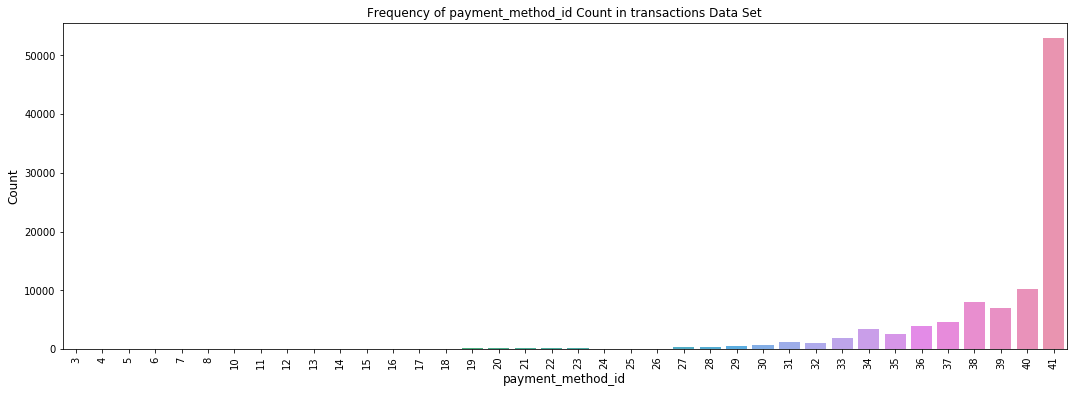

payment_method_id Count [(41, 52874), (40, 10287), (38, 7960), (39, 6994), (37, 4582), (36, 3967), (34, 3371), (35, 2584), (33, 1901), (31, 1183), (32, 1104), (30, 710), (29, 510), (28, 417), (27, 284), (23, 218), (19, 145), (20, 142), (22, 130), (21, 94), (18, 81), (24, 80), (25, 63), (14, 60), (16, 56), (17, 42), (13, 38), (12, 29), (15, 27), (26, 25), (11, 11), (10, 9), (7, 9), (8, 4), (6, 4), (5, 3), (3, 1), (4, 1)]


In [38]:
# payment_method_id count in transactions Data Set
plt.figure(figsize=(18,6))
#plt.subplot(311)
sns.countplot(x="payment_method_id", data=TRANSACTION)
plt.ylabel('Count', fontsize=12)
plt.xlabel('payment_method_id', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of payment_method_id Count in transactions Data Set", fontsize=12)
plt.show()
payment_method_id_count = Counter(TRANSACTION['payment_method_id']).most_common()
print("payment_method_id Count " +str(payment_method_id_count))

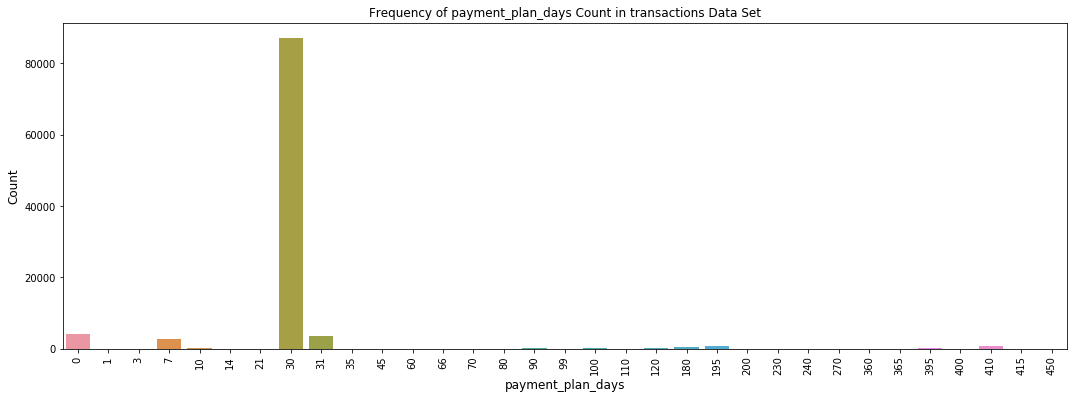

payment_plan_days Count [(30, 87081), (0, 3983), (31, 3656), (7, 2756), (410, 683), (195, 652), (180, 356), (10, 168), (90, 119), (100, 116), (395, 81), (120, 61), (360, 39), (200, 34), (14, 32), (60, 30), (1, 27), (415, 20), (400, 18), (365, 18), (240, 15), (450, 11), (35, 10), (21, 8), (45, 7), (270, 5), (80, 4), (70, 4), (99, 2), (110, 1), (66, 1), (230, 1), (3, 1)]


In [39]:
# payment_plan_days count in transactions Data Set
plt.figure(figsize=(18,6))
sns.countplot(x="payment_plan_days", data=TRANSACTION)
plt.ylabel('Count', fontsize=12)
plt.xlabel('payment_plan_days', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of payment_plan_days Count in transactions Data Set", fontsize=12)
plt.show()
payment_plan_days_count = Counter(TRANSACTION['payment_plan_days']).most_common()
print("payment_plan_days Count " +str(payment_plan_days_count))

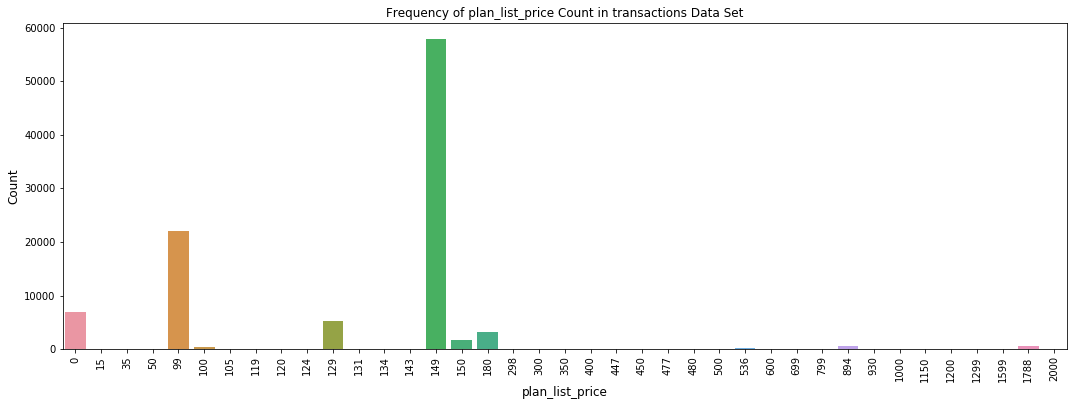

plan_list_price Count [(149, 57921), (99, 22119), (0, 6985), (129, 5297), (180, 3164), (150, 1734), (1788, 680), (894, 654), (100, 346), (536, 281), (119, 128), (1599, 112), (480, 110), (477, 78), (1200, 50), (799, 49), (298, 42), (447, 37), (35, 35), (300, 32), (930, 31), (120, 26), (699, 17), (600, 13), (1299, 13), (134, 9), (450, 8), (500, 6), (400, 4), (350, 4), (50, 3), (1000, 3), (124, 3), (143, 1), (2000, 1), (105, 1), (1150, 1), (15, 1), (131, 1)]


In [40]:
# plan_list_price count in transactions Data Set
plt.figure(figsize=(18,6))
sns.countplot(x="plan_list_price", data=TRANSACTION)
plt.ylabel('Count', fontsize=12)
plt.xlabel('plan_list_price', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of plan_list_price Count in transactions Data Set", fontsize=12)
plt.show()
plan_list_price_count = Counter(TRANSACTION['plan_list_price']).most_common()
print("plan_list_price Count " +str(plan_list_price_count))

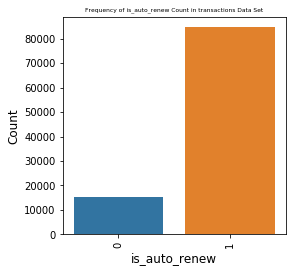

is_auto_renew Count [('1', 84608), ('0', 15392)]


In [41]:
# is_auto_renew count in transactions Data Set
plt.figure(figsize=(4,4))
sns.countplot(x="is_auto_renew", data=TRANSACTION)
plt.ylabel('Count', fontsize=12)
plt.xlabel('is_auto_renew', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of is_auto_renew Count in transactions Data Set", fontsize=6)
plt.show()
is_auto_renew_count = Counter(TRANSACTION['is_auto_renew']).most_common()
print("is_auto_renew Count " +str(is_auto_renew_count))

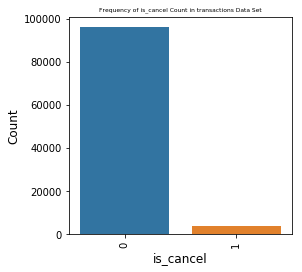

is_cancel Count [('0', 96043), ('1', 3957)]


In [42]:
# is_cancel count in transactions Data Set
plt.figure(figsize=(4,4))
sns.countplot(x="is_cancel", data=TRANSACTION)
plt.ylabel('Count', fontsize=12)
plt.xlabel('is_cancel', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of is_cancel Count in transactions Data Set", fontsize=6)
plt.show()
is_cancel_count = Counter(TRANSACTION['is_cancel']).most_common()
print("is_cancel Count " +str(is_cancel_count))

In [34]:
USER_LOGS = pd.read_csv("../data/raw/USER_LOGS_subset_TRAIN.csv", parse_dates=True)

In [35]:
USER_LOGS.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,_dataobs_
0,KrtHMRcPO1hhclZLDp7Rfd4EuWnkeE3uIYLhh2bjOAs=,2015-01-04,5,1,2,3,8,16,3105.657,6323
1,/osNsLxx3k7if1esxb2GpYHNkHnmNPOU3292bANjBGc=,2017-02-26,1,0,2,0,5,8,1592.751,7000
2,9/WzsCZLLsiNdZSbJXwtDotjEIRcFoAuSp84CH4GArw=,2015-05-25,0,0,0,0,15,15,2422.230,7527
3,wZhG4MNE0HD00iHO0dhRH0P8dkqE9rZGuZVmF8Hf0SM=,2015-04-17,0,0,0,0,47,1,9668.558,9062
4,vuiqdXbZfyKDbUx5Y8drB6NAUxuvR6P5/Rj8+8b21JM=,2017-01-31,2,3,3,1,70,31,18793.319,9953


In [38]:
USER_LOGS.describe()

,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,_dataobs_
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,1.000000e+05
mean,6.55941,1.649440,1.015130,1.126220,30.62194,30.066780,-1.291272e+12,1.955153e+08
std,14.55745,4.261639,2.180676,2.732274,40.73382,33.896641,1.091253e+14,1.131440e+08
min,0.00000,0.000000,0.000000,0.000000,0.00000,1.000000,-9.223372e+15,6.323000e+03
25%,0.00000,0.000000,0.000000,0.000000,6.00000,8.000000,1.878381e+03,9.803536e+07
50%,2.00000,1.000000,0.000000,0.000000,16.00000,19.000000,4.614436e+03,1.950406e+08
75%,7.00000,2.000000,1.000000,1.000000,38.00000,40.000000,1.026148e+04,2.931583e+08
max,1187.00000,343.000000,143.000000,172.000000,1632.00000,1190.000000,2.419718e+06,3.921047e+08
